In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

In [2]:
# 5.1 Line Plot

# A. Make a dataframe called foot using the "./international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set

foot = pd.read_csv("./international_football_results.csv")
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer

foot['year'] = pd.to_datetime(foot['date']).dt.year

In [4]:
foot.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [5]:
foot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39669 entries, 0 to 39668
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        39669 non-null  object
 1   home_team   39669 non-null  object
 2   away_team   39669 non-null  object
 3   home_score  39669 non-null  int64 
 4   away_score  39669 non-null  int64 
 5   tournament  39669 non-null  object
 6   city        39669 non-null  object
 7   country     39669 non-null  object
 8   neutral     39669 non-null  bool  
 9   year        39669 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 2.8+ MB


In [6]:
# B. Let's chart how many games occured in each year:

# First of all, let's look at the data we're going to plot

foot['year'].value_counts()

2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1872       1
1873       1
1874       1
1875       1
Name: year, Length: 147, dtype: int64

In [7]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()
foot['year'].value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: year, Length: 147, dtype: int64

<AxesSubplot:>

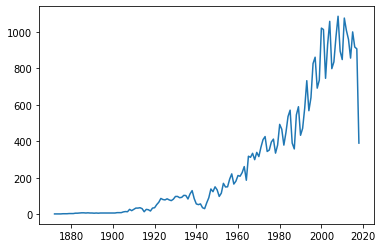

In [8]:
# Finally, we're ready to plot the change over time with .plot()
foot['year'].value_counts().sort_index().plot()

<AxesSubplot:>

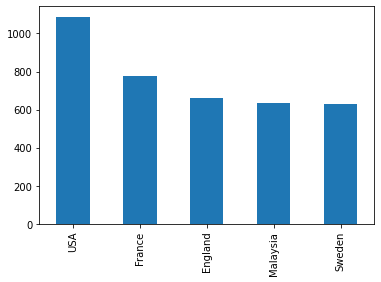

In [32]:
# 5.2 Bar Charts
# A. Let's see how many games each country played, represented as a bar chart

foot['country'].value_counts().head().plot(kind="bar")

<AxesSubplot:>

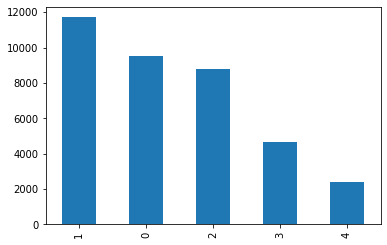

In [33]:
# B. Now let's plot the occurence of specific scores for the home team
foot['home_score'].value_counts().head().plot(kind="bar")

<AxesSubplot:>

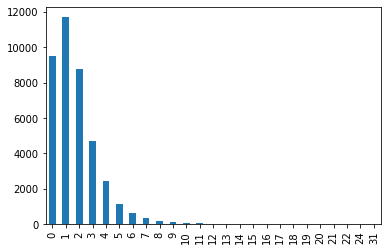

In [60]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
foot['home_score'].value_counts().sort_index(ascending =True).plot(kind="bar")


<AxesSubplot:>

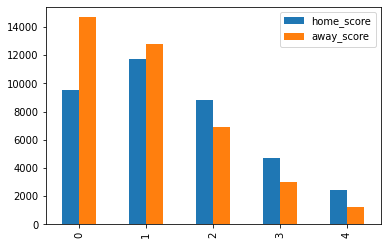

In [54]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe

foot[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind = 'bar')


In [61]:
# 5.3 Histograms
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_ratings.csv' file
#    Inspect the data using some exploratory data analysis methods

choc = pd.read_csv('./chocolate_ratings.csv')
choc.columns
pd.DataFrame(choc.dtypes, columns=["DataType"])

,DataType
Company \n(Maker-if known),object
Specific Bean Origin\nor Bar Name,object
REF,int64
Review\nDate,int64
Cocoa\nPercent,object
Company\nLocation,object
Rating,float64
Bean\nType,object
Broad Bean\nOrigin,object


In [64]:
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


<AxesSubplot:ylabel='Frequency'>

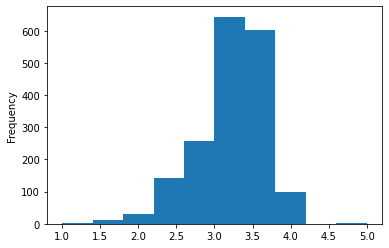

In [62]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
choc['Rating'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

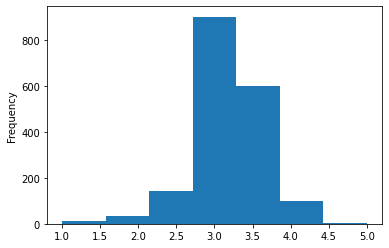

In [68]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed

choc["Rating"].plot(kind = "hist", bins =7)

Text(0.5, 1.0, 'Distribution of Chocolate Ratings')

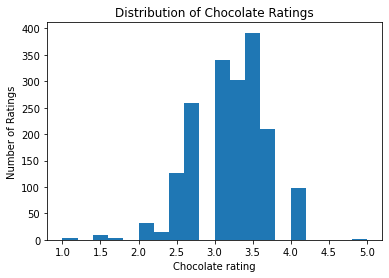

In [69]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib

choc["Rating"].plot(kind = "hist", bins =20)

plt.ylabel("Number of Ratings")
plt.xlabel("Chocolate rating")
plt.title('Distribution of Chocolate Ratings')


<AxesSubplot:xlabel='Review\nDate', ylabel='Rating'>

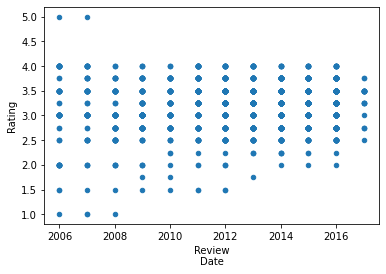

In [70]:
# 5.4 Scatter Plots
# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind="scatter", x="Review\nDate", y="Rating" )
# Why is this graph not so helpful?

<Figure size 720x1296 with 0 Axes>

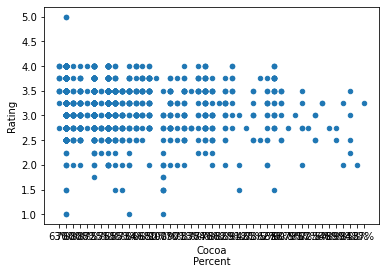

<Figure size 720x1296 with 0 Axes>

In [77]:
choc.plot(kind="scatter", x="Cocoa\nPercent", y="Rating" )
plt.figure(figsize=(10,18))

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

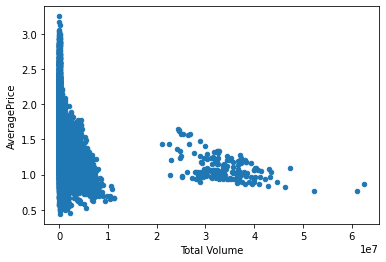

In [71]:
# B. Create a dataframe called avo from './avocado.csv'.  Explore this new dataframe, then scatter plot correlation between Total Volume and AveragePrice
avo = pd.read_csv('./avocado.csv')
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice')

In [ ]:
# 5.5 Visualizations to Hypotheses
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports